In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score,f1_score,precision_score, classification_report
from sklearn import preprocessing

In [ ]:
data = pd.read_csv("Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
data_1= data.rename(columns={"Undergrad": "Undergrad","Marital.Status":"Relationship","Taxable.Income":"Tax",
                             "City.Population":"Population","Work.Experience":"Experience","Urban":"Urban"})
data_1

,Undergrad,Relationship,Tax,Population,Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
data_1['Tax'] = data_1.Tax.map(lambda  taxable_income : 'Risky' if taxable_income <= 30000 else 'Good')

In [ ]:
data_1.head()

,Undergrad,Relationship,Tax,Population,Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Undergrad     600 non-null    object
 1   Relationship  600 non-null    object
 2   Tax           600 non-null    object
 3   Population    600 non-null    int64 
 4   Experience    600 non-null    int64 
 5   Urban         600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [ ]:
#Presprocessing the data set
label_encoder = preprocessing.LabelEncoder()
data_1['Tax'] = label_encoder.fit_transform(data_1['Tax'])
data_1['Undergrad'] = label_encoder.fit_transform(data_1['Undergrad'])
data_1['Relationship'] = label_encoder.fit_transform(data_1['Relationship'])
data_1['Urban'] = label_encoder.fit_transform(data_1['Urban'])

In [ ]:
data_1.columns

Index(['Undergrad', 'Relationship', 'Tax', 'Population', 'Experience',
       'Urban'],
      dtype='object')

In [ ]:
data_1

,Undergrad,Relationship,Tax,Population,Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [ ]:
x=data_1[['Undergrad','Relationship','Population','Experience','Urban']]
y=data_1['Tax']

In [ ]:
x,y

(     Undergrad  Relationship  Population  Experience  Urban
 0            0             2       50047          10      1
 1            1             0      134075          18      1
 2            0             1      160205          30      1
 3            1             2      193264          15      1
 4            0             1       27533          28      0
 ..         ...           ...         ...         ...    ...
 595          1             0       39492           7      1
 596          1             0       55369           2      1
 597          0             0      154058           0      1
 598          1             1      180083          17      0
 599          0             0      158137          16      0
 
 [600 rows x 5 columns], 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 595    0
 596    0
 597    0
 598    0
 599    0
 Name: Tax, Length: 600, dtype: int64)

In [ ]:
colnames = list(data_1.columns)
colnames

['Undergrad', 'Relationship', 'Tax', 'Population', 'Experience', 'Urban']

In [ ]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=10)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((420, 5), (180, 5), (420,), (180,))

In [ ]:
y_train

266    0
146    0
400    0
296    0
273    0
      ..
369    0
320    0
527    0
125    0
265    1
Name: Tax, Length: 420, dtype: int64

In [ ]:
y_test

69     0
27     0
488    0
540    1
285    0
      ..
582    0
402    0
126    1
434    1
576    0
Name: Tax, Length: 180, dtype: int64

In [ ]:
#Building Decision Tree Classifier using Entropy Criteria
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
y_pred.shape

(180,)

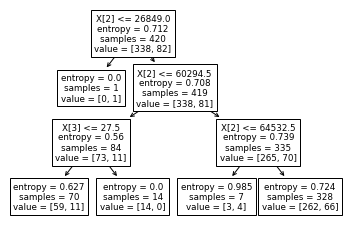

In [ ]:
#PLot the decision tree
tree.plot_tree(model);

[Text(0.375, 0.875, 'Population <= 26849.0\nentropy = 0.712\nsamples = 420\nvalue = [338, 82]\nclass = 0(Risky)'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1(Good)'),
 Text(0.5, 0.625, 'Population <= 60294.5\nentropy = 0.708\nsamples = 419\nvalue = [338, 81]\nclass = 0(Risky)'),
 Text(0.25, 0.375, 'Experience <= 27.5\nentropy = 0.56\nsamples = 84\nvalue = [73, 11]\nclass = 0(Risky)'),
 Text(0.125, 0.125, 'entropy = 0.627\nsamples = 70\nvalue = [59, 11]\nclass = 0(Risky)'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]\nclass = 0(Risky)'),
 Text(0.75, 0.375, 'Population <= 64532.5\nentropy = 0.739\nsamples = 335\nvalue = [265, 70]\nclass = 0(Risky)'),
 Text(0.625, 0.125, 'entropy = 0.985\nsamples = 7\nvalue = [3, 4]\nclass = 1(Good)'),
 Text(0.875, 0.125, 'entropy = 0.724\nsamples = 328\nvalue = [262, 66]\nclass = 0(Risky)')]

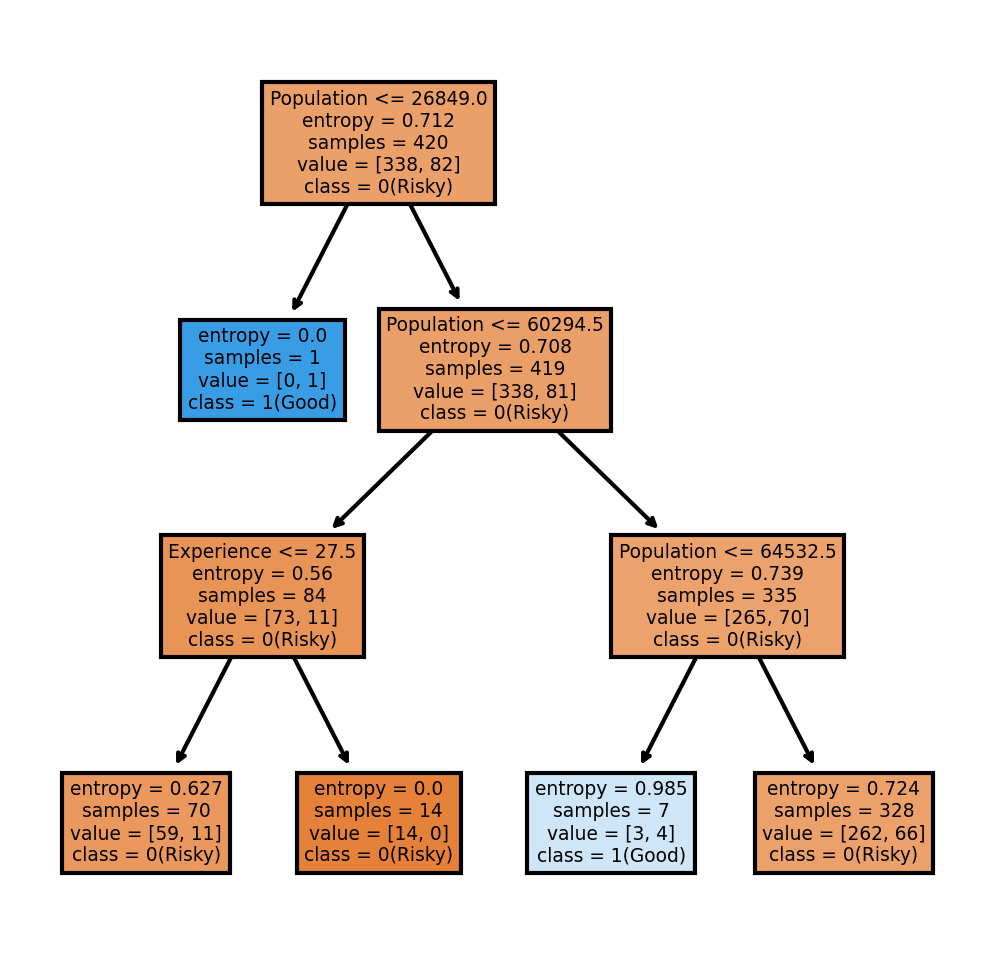

In [ ]:
fn=['Undergrad','Relationship', 'Population', 'Experience', 'Urban']
cn=["0(Risky)","1(Good)"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True)

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

0    175
1      5
dtype: int64

In [ ]:
preds

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
pd.crosstab(y_test,preds) 

col_0,0,1
Tax,,
0,134,4
1,41,1


In [ ]:
# Accuracy 
np.mean(preds==y_test)

0.75

In [ ]:
count_misclassified =(y_test != y_pred).sum()
count_misclassified

45

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       138
           1       0.20      0.02      0.04        42

    accuracy                           0.75       180
   macro avg       0.48      0.50      0.45       180
weighted avg       0.63      0.75      0.67       180

